In [1]:
library(GLMsData)
library(MASS)
data(paper)

In [17]:
library(splines)

In [2]:
str(paper)

'data.frame':	19 obs. of  2 variables:
 $ Strength: num  6.3 11.1 20 24 26.1 30 33.8 34 38.1 39.9 ...
 $ Hardwood: num  1 1.5 2 3 4 4.5 5 5.5 6 6.5 ...


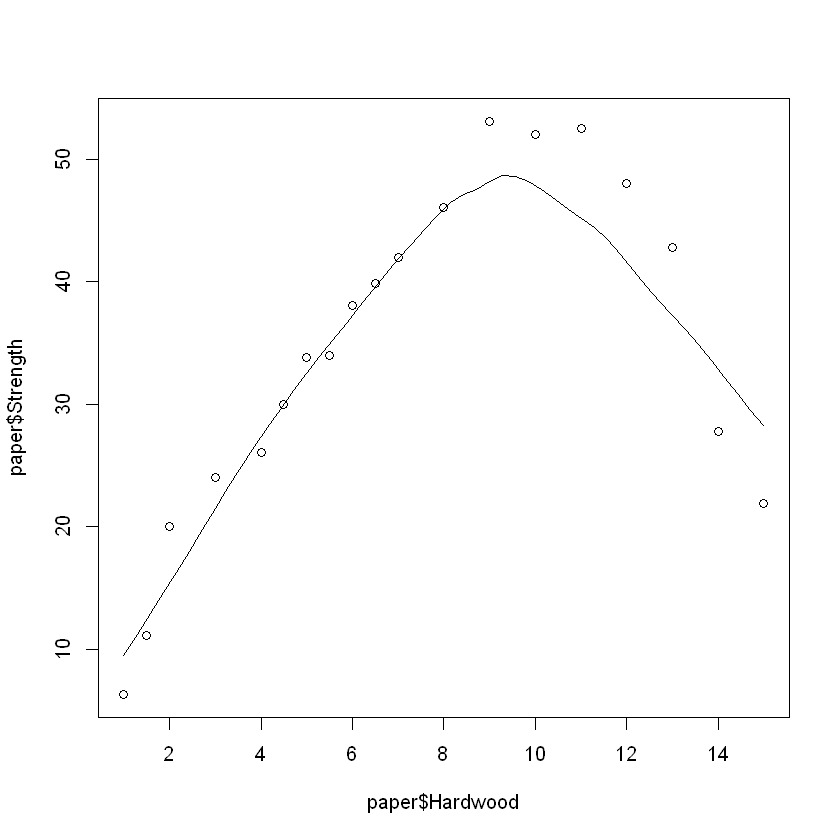

In [4]:
scatter.smooth(paper$Strength ~ paper$Hardwood)

In [15]:
lm.poly <- lm(Strength ~ poly(Hardwood, 3), data=paper)

In [16]:
coef(summary(lm.poly))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),34.18421,0.5930501,57.641352,5.041090e-19
"poly(Hardwood, 3)1",32.30213,2.5850455,12.495767,2.480980e-09
"poly(Hardwood, 3)2",-45.39625,2.5850455,-17.561103,2.058028e-11
"poly(Hardwood, 3)3",-14.57400,2.5850455,-5.637811,4.721725e-05


In [18]:
lm.ns <- lm(Strength ~ ns(Hardwood, 3), data=paper)
lm.bs <- lm(Strength ~ bs(Hardwood, 3), data=paper)

In [19]:
coef(summary(lm.ns))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),10.430305,1.944770,5.363259,7.898393e-05
"ns(Hardwood, 3)1",49.562861,3.015621,16.435376,5.308195e-11
"ns(Hardwood, 3)2",45.730410,4.663146,9.806773,6.455393e-08
"ns(Hardwood, 3)3",2.567435,2.248037,1.142079,2.713250e-01


In [20]:
coef(summary(lm.bs))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.825332,1.781348,5.515672,5.928773e-05
"bs(Hardwood, 3)1",22.027588,5.353516,4.114602,9.186643e-04
"bs(Hardwood, 3)2",75.942590,4.339106,17.501897,2.160168e-11
"bs(Hardwood, 3)3",10.310237,2.944812,3.501153,3.215916e-03


In [21]:
extractAIC(lm.poly)

[1]  4.00000 39.59885

In [22]:
extractAIC(lm.ns)

[1]  4.00000 44.74287

In [23]:
extractAIC(lm.bs)

[1]  4.00000 39.59885

In [26]:
poly.output <- predict(lm.poly, newdata=data.frame(Hardwood=paper$Hardwood))

In [29]:
ns.output <- predict(lm.ns, newdata=data.frame(Hardwood=paper$Hardwood))

In [31]:
bs.output <- predict(lm.bs, newdata=data.frame(Hardwood=paper$Hardwood))

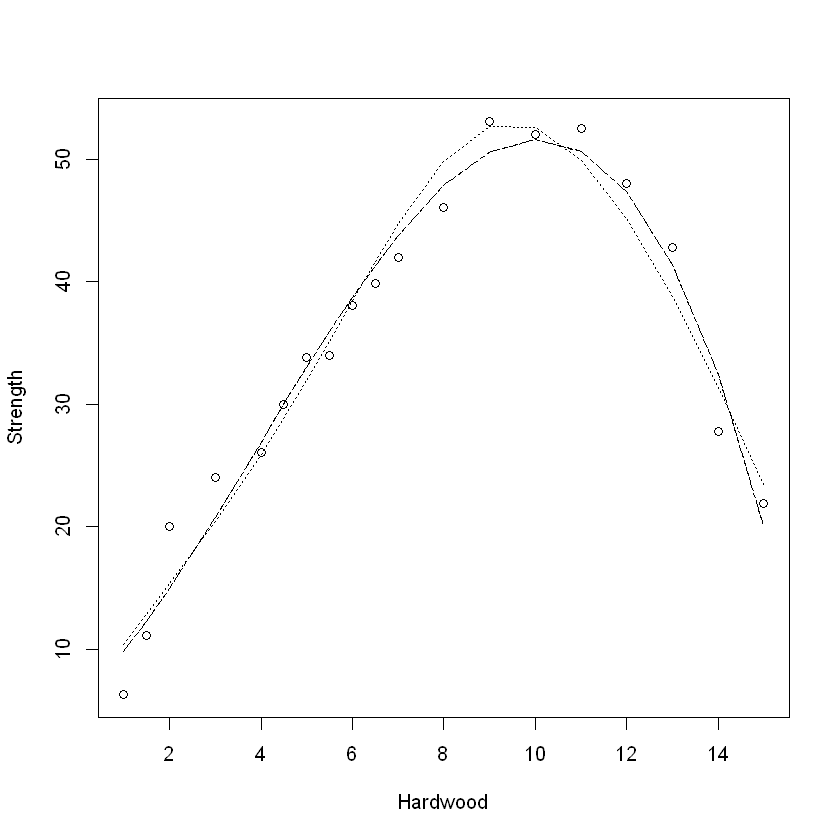

In [32]:
plot(Strength ~ Hardwood, data=paper)
lines(poly.output ~ paper$Hardwood, lty=2)
lines(ns.output ~ paper$Hardwood, lty=3)
lines(bs.output ~ paper$Hardwood, lty=4)